In [1]:
%%html
<img src="https://www.fao.org/images/corporatelibraries/fao-logo/fao-logo-fr.svg?sfvrsn=f64522b4_31",width=60,height=60>

# Etude de cas  
Analyser les aides alimentaires et la sous-nutrition dans le monde à partir des données de la <a href="https://www.fao.org/home/fr">FAO</a> 

**1 - Import et analyse des dataframes**  
[1-1 Aide alimentaire](#1-1---Aide-alimentaire)  
[1-2 Population](#1-2---Population)  
[1-3 Sous-nutrition](#1-3---Sous-nutrition)  
[1-4 Disponibilité alimentaire](#1-4---Disponibilité-alimentaire)

**2 - Calcul d'indicateurs et analyse**  
[2-1 Proportion des personnes en sous-nutrition](#2-1---Proportion-de-personnes-en-sous-nutrition)  
[2-2 Disponibilité alimentaire mondiale](#2-2---Disponibilité-alimentaire-mondiale---Nombre-théorique-de-personnes-pouvant-être-nourries)  
[2-3 Répartition de la disponibilité alimentaire](#2-3---Répartition-de-la-disponibilité-alimentaire)  
[2-4 Zoom sur les céréales](#2-4---Zoom-sur-les-céréales)  
[2-5 Analyse du manioc en Thaïlande](#2-5---Etude-du-cas-de-l'utilisation-du-manioc-en-Thaïlande)  
[2-6 Demandes de Mélanie](#2-6---Demande-de-Mélanie)  
[2-7 Autres indicateurs](#2-7---Autres-indicateurs)


---

In [2]:
import matplotlib.pyplot as plt

#!pip install mitosheet
# import mitosheet as mito
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid", palette="rainbow")
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# import warnings
# warnings.filterwarnings('ignore')

---
---

## 1 - Import des différents dataframes et rapide analyse

#### 1-1 - Aide alimentaire

In [3]:
path = "data/aide_alimentaire.csv"
df_aide_alimentaire = pd.read_csv(path)

In [4]:
# Valeur exprimée en tonnes
df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [5]:
df_aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


**Pas de valeurs nulles ou manquantes  
Type des variables adéquat**

In [6]:
# Affichage des valeurs uniques pour chaque colonne
for col in df_aide_alimentaire.columns:
  print(col)
  print(df_aide_alimentaire[col].unique())
  print("-" * 80)

Pays bénéficiaire
['Afghanistan' 'Algérie' 'Angola' 'Bangladesh' 'Bénin' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Burkina Faso' 'Burundi' 'Cambodge'
 'Cameroun' 'Chine, continentale' 'Colombie' 'Comores' 'Congo'
 "Côte d'Ivoire" 'Cuba' 'Djibouti' 'Égypte' 'El Salvador' 'Équateur'
 'Éthiopie' 'Gambie' 'Géorgie' 'Ghana' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Haïti' 'Honduras' "Iran (République islamique d')"
 'Iraq' 'Jordanie' 'Kenya' 'Kirghizistan' 'Lesotho' 'Liban' 'Libéria'
 'Libye' 'Madagascar' 'Malawi' 'Mali' 'Mauritanie' 'Mozambique' 'Myanmar'
 'Népal' 'Nicaragua' 'Niger' 'Ouganda' 'Pakistan' 'Palestine'
 'Philippines' 'République arabe syrienne' 'République centrafricaine'
 'République démocratique du Congo'
 'République démocratique populaire lao' 'République dominicaine'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Sierra Leone' 'Somalie' 'Soudan' 'Soudan du Sud' 'Sri Lanka' 'Swaziland'
 'Tadjikista

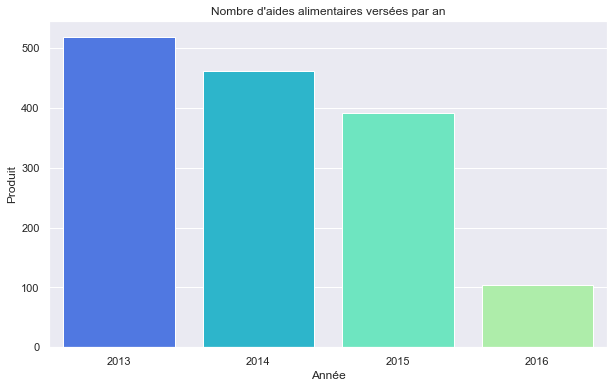

In [7]:
# Nombre d'aides alimentaires versées par an
df_temp = df_aide_alimentaire.groupby("Année").count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Année", y="Produit", data=df_temp)
plt.title("Nombre d'aides alimentaires versées par an")
plt.show();

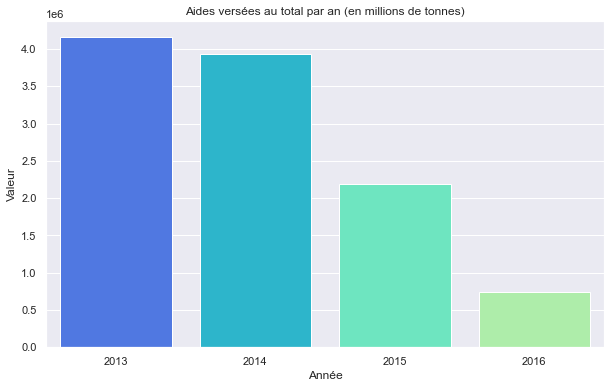

In [8]:
# Aides versées au total par an (en t)
df_temp = df_aide_alimentaire.groupby("Année").sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Année", y="Valeur", data=df_temp)
plt.title("Aides versées au total par an (en millions de tonnes)")
plt.show();

**Baisse des aides versées tant en quantité qu'en volume**

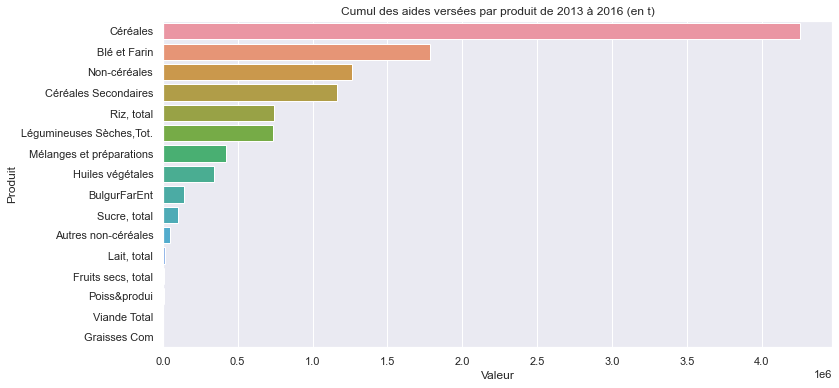

In [9]:
# Cumul des aides versées par produit de 2013 à 2016 (en millions de tonnes)
df_temp = df_aide_alimentaire.groupby("Produit").sum().reset_index()
df_temp = df_temp.sort_values("Valeur", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x="Valeur", y="Produit", data=df_temp)
plt.title("Cumul des aides versées par produit de 2013 à 2016 (en t)")
plt.show();

In [10]:
# Répartition des aides versées par produit de 2013 à 2016
values = df_temp["Valeur"]
labels = df_temp["Produit"]

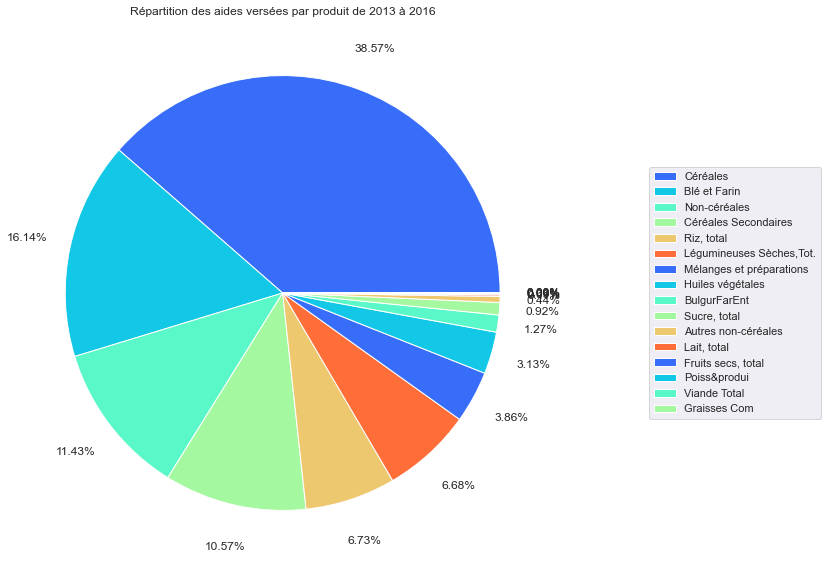

In [11]:
plt.figure(figsize=(10, 10))
plt.pie(values, autopct='%.2f%%', pctdistance=1.2)
plt.title("Répartition des aides versées par produit de 2013 à 2016")
plt.legend(labels, loc="right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show();
# Faire un cumul "Autres"

**Les aides versées sont principalement des céréales**

---

#### 1-2 - Population

In [12]:
path = "data/population.csv"
df_population = pd.read_csv(path)
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.59
1,Afghanistan,2014,33370.79
2,Afghanistan,2015,34413.60
3,Afghanistan,2016,35383.03
4,Afghanistan,2017,36296.11


In [13]:
df_population["Valeur"] = df_population["Valeur"] * 1000

NumExpr defaulting to 4 threads.


In [14]:
# Affichage des valeurs uniques pour chaque colonne
for col in df_population.columns:
  print(col)
  print(df_population[col].unique())
  print("-" * 80)

Zone
['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Anguilla' 'Antigua-et-Barbuda' 'Antilles néerlandaises (ex)'
 'Arabie saoudite' 'Argentine' 'Arménie' 'Aruba' 'Australie' 'Autriche'
 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh' 'Barbade' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bonaire, Saint-Eustache et Saba'
 'Bosnie-Herzégovine' 'Botswana' 'Brésil' 'Brunéi Darussalam' 'Bulgarie'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada'
 'Chili' 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, continentale' 'Chine, Taiwan Province de' 'Chypre' 'Colombie'
 'Comores' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba' 'Curaçao'
 'Danemark' 'Djibouti' 'Dominique' 'Égypte' 'El Salvador'
 'Émirats arabes unis' 'Équateur' 'Érythrée' 'Espagne' 'Estonie'
 'Eswatini' "États-Unis d'Amérique" 'Éthiopie' 'Fédération de Russie'
 'Fidji' 'Finlande' 'France' 'Gabon' 'Gambie' 'Gé

In [15]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


**Pas de valeurs nulles ou manquantes  
Type des variables adéquat**

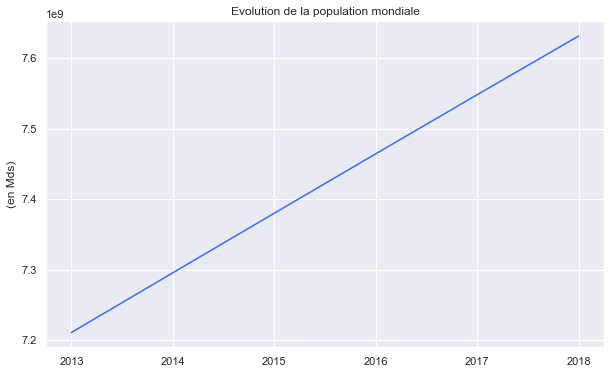

In [16]:
# Evolution de la population mondiale
df_temp = df_population.groupby(by="Année").sum()
plt.figure(figsize=(10, 6))
plt.plot(df_temp)
plt.title("Evolution de la population mondiale")
plt.ylabel("(en Mds)")
plt.show();

**Croissance constante de la population mondiale**

---

#### 1-3 - Sous-nutrition

In [17]:
path = "data/sous_nutrition.csv"
df_sous_nutrition = pd.read_csv(path)
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [18]:
# Affichage des valeurs uniques pour chaque colonne
for col in df_sous_nutrition.columns:
  print(col)
  print(df_sous_nutrition[col].unique())
  print("-" * 80)

Zone
['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Antigua-et-Barbuda' 'Arabie saoudite' 'Argentine' 'Arménie'
 'Australie' 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh'
 'Barbade' 'Bélarus' 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine' 'Botswana'
 'Brésil' 'Brunéi Darussalam' 'Bulgarie' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada' 'Chili'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao' 'Chine, continentale'
 'Chine, Taiwan Province de' 'Chypre' 'Colombie' 'Comores' 'Congo'
 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba' 'Danemark' 'Djibouti'
 'Dominique' 'Égypte' 'El Salvador' 'Émirats arabes unis' 'Équateur'
 'Érythrée' 'Espagne' 'Estonie' 'Eswatini' "États-Unis d'Amérique"
 'Éthiopie' 'Fédération de Russie' 'Fidji' 'Finlande' 'France' 'Gabon'
 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Grenade' 'Groenland' 'Guatemala'
 'Guinée' 'Guinée équatoriale' 'Guiné

In [19]:
df_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


**594 Valeurs manquantes  
Mauvais type pour l'Année car intervalle d'année  
Mauvais type pour Valeur car présence de "<1"**

In [20]:
# Transformation de l'intervalle Année en année
df_sous_nutrition["Année"] = df_sous_nutrition["Année"].map({
    "2012-2014": 2013,
    "2013-2015": 2014,
    "2014-2016": 2015,
    "2015-2017": 2016,
    "2016-2018": 2017,
    "2017-2019": 2018
})
# Mise au format de l'année
df_sous_nutrition["Année"] = df_sous_nutrition["Année"].astype(int)

In [21]:
# Affichage des pays ayant des valeurs nulles
df_sous_nutrition[df_sous_nutrition["Valeur"].isna()]["Zone"].unique()

array(['Allemagne', 'Andorre', 'Antigua-et-Barbuda', 'Argentine',
       'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn',
       'Bélarus', 'Belgique', 'Bermudes', 'Bhoutan', 'Bosnie-Herzégovine',
       'Brésil', 'Brunéi Darussalam', 'Burundi', 'Canada',
       'Chine - RAS de Hong-Kong', 'Chine, continentale', 'Comores',
       'Croatie', 'Cuba', 'Danemark', 'Djibouti', 'Érythrée', 'Espagne',
       'Estonie', "États-Unis d'Amérique", 'Fédération de Russie',
       'Finlande', 'France', 'Grèce', 'Grenade', 'Groenland', 'Guinée',
       'Guinée équatoriale', 'Guinée-Bissau', 'Hongrie', 'Îles Cook',
       'Îles Marshall', 'Irlande', 'Islande', 'Israël', 'Italie', 'Japon',
       'Kazakhstan', 'Koweït', 'Lettonie', 'Libye', 'Lituanie',
       'Luxembourg', 'Maldives', 'Malte', 'Micronésie (États fédérés de)',
       'Monténégro', 'Nauru', 'Niger', 'Nioué', 'Norvège',
       'Nouvelle-Zélande', 'Ouganda', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Pays-Bas'

**Pas de logique dans les valeurs manquantes, soit cela concerne des pays "riches" auquel cas la valeur est sûrement nulle, soit des pays qui ne remontent pas ce type d'information.  
Problème avec les valeurs "<1" (100.000) qui a un impact totalement différent en fonction de la population du pays.**  

Méthodologie :
- Mettre les valeurs "<1" en Nan
- Remplacer les valeurs Nan par le taux moyen de sous-nutrition par continent


In [22]:
df_sous_nutrition[df_sous_nutrition["Valeur"] == "<0.1"]["Zone"].value_counts()

Saint-Vincent-et-les Grenadines    6
Fidji                              6
Dominique                          6
Chine - RAS de Macao               6
Sao Tomé-et-Principe               6
Îles Salomon                       6
Nouvelle-Calédonie                 6
Kiribati                           6
Chypre                             6
Arménie                            6
Barbade                            6
Suriname                           6
Guyana                             6
Vanuatu                            6
Belize                             6
Macédoine du Nord                  6
Maurice                            6
Trinité-et-Tobago                  6
Polynésie française                6
Cabo Verde                         5
Samoa                              1
Name: Zone, dtype: int64

In [23]:
# Mise à NaN de la valeur <0.1 (100000) - Attention biais dans l'analyse à défaut d'avoir des données précises pour ces pays
df_sous_nutrition["Valeur"].replace({"<0.1": np.nan}, inplace=True)

In [24]:
# Mise à l'unité de la valeur
df_sous_nutrition["Valeur"] = pd.to_numeric(df_sous_nutrition["Valeur"])
df_sous_nutrition["Valeur"] = df_sous_nutrition["Valeur"] * 1000000

In [25]:
# Importation du fichier country.csv contenant le mapping des pays et leur continent
path = "data/country.csv"
df_country = pd.read_csv(path)

In [26]:
# Jointure pour importer les données continent
df_sous_nutrition = df_sous_nutrition.merge(df_country, how="inner", left_on="Zone", right_on="Country")
# Jointure pour importer les données de population
df_sous_nutrition = df_sous_nutrition.merge(df_population, how="inner", on=["Zone", "Année"])
# Nettoyage du dataframe
df_sous_nutrition.drop(columns=["Country", "Alpha-3 code"], inplace=True)
df_sous_nutrition.rename(columns={"Valeur_x": "Sous-nutrition", "Valeur_y": "Population"}, inplace=True)
df_sous_nutrition.head()

,Zone,Année,Sous-nutrition,Continent,Population
0,Afghanistan,2013,8600000.00,Asia,32269589.00
1,Afghanistan,2014,8800000.00,Asia,33370794.00
2,Afghanistan,2015,8900000.00,Asia,34413603.00
3,Afghanistan,2016,9700000.00,Asia,35383032.00
4,Afghanistan,2017,10500000.00,Asia,36296113.00


In [27]:
# Calcul de la proportion de sous-nutrition par continent et par année
df_temp = df_sous_nutrition.groupby(["Continent", "Année"]).sum()
df_temp = df_temp.reset_index()
df_temp["Proportion"] = df_temp["Sous-nutrition"] * 100 / df_temp["Population"]
df_temp.drop(["Sous-nutrition", "Population"], axis=1, inplace=True)
df_temp.head()

,Continent,Année,Proportion
0,Africa,2013,11.97
1,Africa,2014,11.83
2,Africa,2015,11.81
3,Africa,2016,12.00
4,Africa,2017,12.01


In [28]:
# Calcul "estimatif" de la population en sous-nutrition pour les valeux NaN de df_sous_nutrition
df_sous_nutrition_nan = df_temp.merge(df_sous_nutrition, on=["Année", "Continent"])
df_sous_nutrition_nan["Sous-nutrition"].fillna(df_sous_nutrition_nan["Population"] * df_sous_nutrition_nan["Proportion"] / 100, inplace=True)
df_sous_nutrition_nan.drop(columns=["Proportion"], inplace=True)
df_sous_nutrition_nan.head()

,Continent,Année,Zone,Sous-nutrition,Population
0,Africa,2013,Afrique du Sud,2200000.00,53687121.00
1,Africa,2013,Algérie,1300000.00,38140133.00
2,Africa,2013,Angola,7600000.00,26015781.00
3,Africa,2013,Bénin,800000.00,10004591.00
4,Africa,2013,Botswana,400000.00,2062548.00


In [29]:
df_sous_nutrition_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 0 to 1133
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       1134 non-null   object 
 1   Année           1134 non-null   int64  
 2   Zone            1134 non-null   object 
 3   Sous-nutrition  1134 non-null   float64
 4   Population      1134 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 53.2+ KB


---

#### 1-4 - Disponibilité alimentaire

In [30]:
path = "data/dispo_alimentaire.csv"
df_dispo_alimentaire = pd.read_csv(path)
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.00,1.72,0.20,0.77,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.00,0.06,0.01,0.03,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.00,2.70,0.02,0.05,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN


In [31]:
df_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

**Nombreuses valeurs manquantes qu'il est difficile d'obtenir par ailleurs.  
Pour cette analyse, nous allons les considérer comme nulles  
Le type des variables est adéquat**

In [32]:
# Mise à 0 des valeurs manquantes
df_dispo_alimentaire.fillna(0, inplace=True)

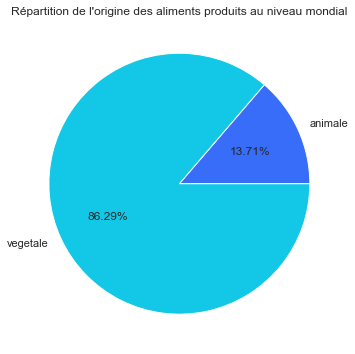

In [33]:
# Répartition de l'origine des aliments produits au niveau mondial
df_temp = df_dispo_alimentaire.groupby("Origine").sum().reset_index()
values = df_temp["Production"]
labels = df_temp["Origine"]
plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, labeldistance=1.10, autopct="%.2f%%")
plt.title("Répartition de l'origine des aliments produits au niveau mondial")
plt.show();

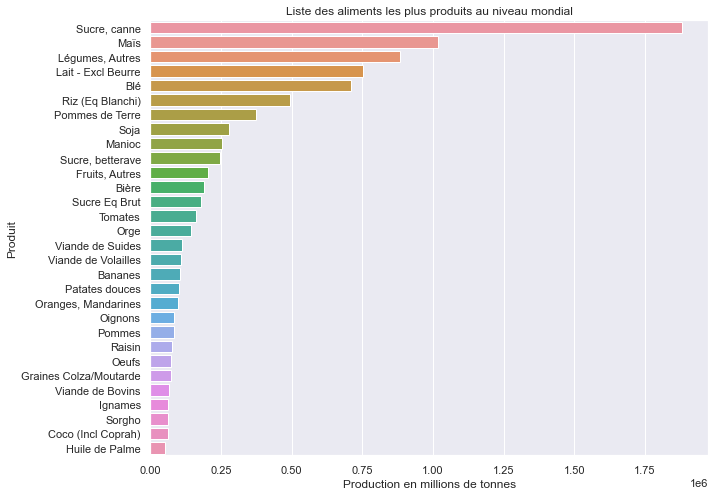

In [34]:
# Liste des aliments les plus produits au niveau mondial
df_temp = df_dispo_alimentaire.groupby("Produit").sum().reset_index()
df_temp.sort_values("Production", ascending=False, inplace=True)
df_temp = df_temp.iloc[:30, :]
plt.figure(figsize=(10, 8))
sns.barplot(x="Production", y="Produit", data=df_temp)
plt.title("Liste des aliments les plus produits au niveau mondial")
plt.xlabel("Production en millions de tonnes")
plt.show();

---
---

# 2 - Calcul d'indicateurs et analyse

#### 2-1 - Proportion de personnes en sous-nutrition

In [35]:
# Création d'un dataframe répertoriant le nombre de personnes par pays en 2017
df_population_2017 = df_population[df_population["Année"] == 2017].copy()

# Unification des noms de zone avec les autres dataframes
df_population_2017.replace(
    {
        "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": "Royaume-Uni",
        "Tchéquie": "Tchéquie (la)",
    },
    inplace=True,
)  
df_population_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    236 non-null    object 
 1   Année   236 non-null    int64  
 2   Valeur  236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [36]:
# Vérification de la population totale - pas d'incohérence avec la population
# mondiale (source : https://www.cairn.info/revue-population-et-societes-2017-8-page-1.htm)
population_2017 = df_population_2017["Valeur"].sum()
print(
    f"Nombre de personnes comptabilisées dans notre fichier population : {int(population_2017)}"
)

Nombre de personnes comptabilisées dans notre fichier population : 7548134111


In [37]:
# Création d'un dataframe sous-nutrition pour l'année 2017 (à partir de df_sous_nutrition_nan)
df_sous_nutrition_2017 = df_sous_nutrition_nan[df_sous_nutrition_nan["Année"] == 2017]

# Jointure - Ajout des données de population
df_sous_nutrition_2017 = pd.merge(
    df_sous_nutrition_2017, df_population_2017, how="inner", on="Zone"
)
df_sous_nutrition_2017.drop(columns=["Année_x", "Année_y"], inplace=True)
df_sous_nutrition_2017.head()

,Continent,Zone,Sous-nutrition,Population,Valeur
0,Africa,Afrique du Sud,3100000.00,57009756.00,57009756.00
1,Africa,Algérie,1300000.00,41389189.00,41389189.00
2,Africa,Angola,5800000.00,29816766.00,29816766.00
3,Africa,Bénin,800000.00,11175198.00,11175198.00
4,Africa,Botswana,500000.00,2205080.00,2205080.00


In [38]:
# Proportion de personne en état de sous-nutrition par pays en 2017
df_sous_nutrition_2017["Proportion (%)"] = (
    df_sous_nutrition_2017["Sous-nutrition"]
    * 100
    / df_sous_nutrition_2017["Population"]
).round(2)
df_sous_nutrition_2017.sort_values(by="Proportion (%)", ascending=False).head(10)

,Continent,Zone,Sous-nutrition,Population,Valeur,Proportion (%)
149,North America,Haïti,5300000.00,10982366.00,10982366.00,48.26
89,Asia,République populaire démocratique de Corée,12000000.00,25429825.00,25429825.00,47.19
26,Africa,Madagascar,10500000.00,25570512.00,25570512.00,41.06
25,Africa,Libéria,1800000.00,4702226.00,4702226.00,38.28
24,Africa,Lesotho,800000.00,2091534.00,2091534.00,38.25
47,Africa,Tchad,5700000.00,15016753.00,15016753.00,37.96
40,Africa,Rwanda,4200000.00,11980961.00,11980961.00,35.06
32,Africa,Mozambique,9400000.00,28649018.00,28649018.00,32.81
94,Asia,Timor-Leste,400000.00,1243258.00,1243258.00,32.17
52,Asia,Afghanistan,10500000.00,36296113.00,36296113.00,28.93


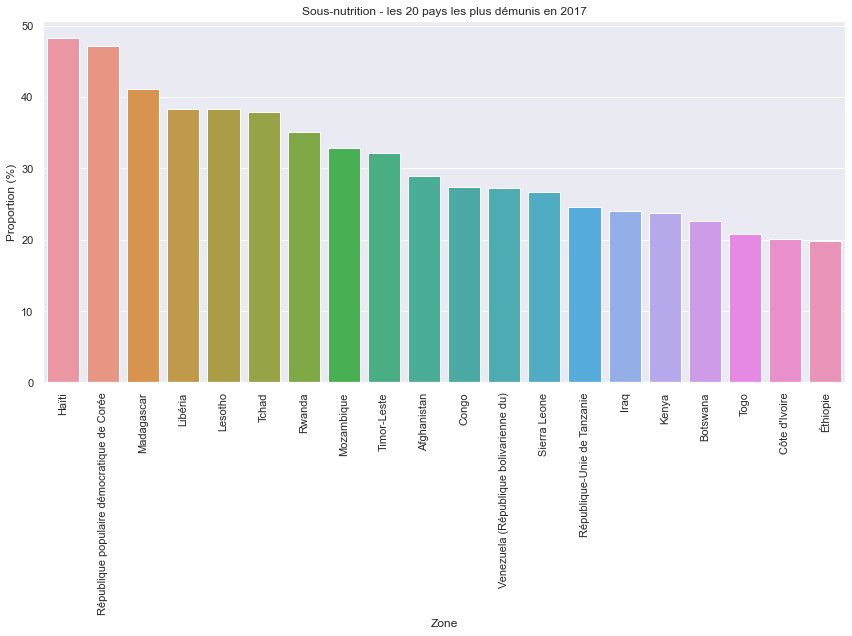

In [39]:
# Taux de sous-nutrition pour les 20 pays les plus démunis
df_temp = df_sous_nutrition_2017.sort_values(by="Proportion (%)",
                                             ascending=False).iloc[:20, :]
plt.figure(figsize=(12,9))
sns.barplot(data=df_temp, x="Zone", y="Proportion (%)")
plt.xticks(rotation=90)
plt.title("Sous-nutrition - les 20 pays les plus démunis en 2017")
plt.tight_layout()

In [40]:
# Proportion de personne en état de sous-nutrition dans le monde en 2017 (pour les 203 pays pour lesquels nous avons des données)
var1 = (
    df_sous_nutrition_2017["Sous-nutrition"].sum()
    * 100
    / df_sous_nutrition_2017["Population"].sum()
)
var2 = df_sous_nutrition_2017["Sous-nutrition"].sum()
print(
    f"Proportion de personnes en état de sous-nutrition en 2017 : {round(var1, 2)} %\nSoit {int(var2)} personnes dans le monde."
)

Proportion de personnes en état de sous-nutrition en 2017 : 10.86 %
Soit 617096876 personnes dans le monde.


In [41]:
# Evolution de la sous-nutrition par pays et par année
df_evo_2017 = df_sous_nutrition.merge(df_population, how="inner", on=["Zone", "Année"])
df_temp.rename(
    columns={"Valeur_x": "Sous-nutrition", "Valeur_y": "Population"}, inplace=True
)
df_evo_2017["Proportion"] = df_evo_2017["Sous-nutrition"] * 100 / df_evo_2017["Population"]
df_evo_2017.head()

,Zone,Année,Sous-nutrition,Continent,Population,Valeur,Proportion
0,Afghanistan,2013,8600000.00,Asia,32269589.00,32269589.00,26.65
1,Afghanistan,2014,8800000.00,Asia,33370794.00,33370794.00,26.37
2,Afghanistan,2015,8900000.00,Asia,34413603.00,34413603.00,25.86
3,Afghanistan,2016,9700000.00,Asia,35383032.00,35383032.00,27.41
4,Afghanistan,2017,10500000.00,Asia,36296113.00,36296113.00,28.93


In [42]:
# Liste des pays les plus sous-nutris par ordre décroissant
df_evo_2017.sort_values("Proportion", ascending=False)["Zone"].unique()

array(['Haïti', 'République populaire démocratique de Corée',
       'Madagascar', 'Tchad', 'Libéria', 'Lesotho', 'Rwanda',
       'Timor-Leste', 'Mozambique', 'Sierra Leone',
       'Venezuela (République bolivarienne du)', 'Congo', 'Afghanistan',
       'Angola', 'République-Unie de Tanzanie', 'Éthiopie', 'Iraq',
       'Kenya', 'Botswana', 'Namibie', 'Mongolie', 'Togo',
       "Côte d'Ivoire", 'Nicaragua', 'Honduras', 'Burkina Faso',
       'Bolivie (État plurinational de)', 'Gabon', 'Malawi', 'Guatemala',
       'Cabo Verde', 'Pakistan', 'Philippines', 'Inde', 'Cambodge',
       'Bangladesh', 'Équateur', 'Myanmar', 'Gambie', 'Nigéria',
       'Mauritanie', 'Liban', 'Sénégal', 'El Salvador', 'Jamaïque',
       'Viet Nam', 'Jordanie', 'Thaïlande', 'République dominicaine',
       'Oman', 'Paraguay', 'Sri Lanka', 'Colombie', 'Bénin', 'Panama',
       'Ghana', 'Géorgie', 'Slovaquie', 'Mexique', 'Pérou',
       'Kirghizistan', 'Cameroun', 'Népal', 'Mali', 'Ouzbékistan',
       'Afrique 

In [43]:
# Evolution du taux de sous-nutrition pour les 10 pays les plus démunis
list = [
    "Haïti",
    "République populaire démocratique de Corée",
    "Madagascar",
    "Tchad",
    "Libéria",
    "Lesotho",
    "Rwanda",
    "Timor-Leste",
    "Mozambique",
    "Sierra Leone",
]
df_top10 = df_evo_2017[df_evo_2017["Zone"].isin(list)]
df_top10 = df_top10.pivot(index="Année", columns="Zone", values="Proportion")
df_top10 = df_top10.reset_index()
df_top10.head()

Zone,Année,Haïti,Lesotho,Libéria,Madagascar,Mozambique,Rwanda,République populaire démocratique de Corée,Sierra Leone,Tchad,Timor-Leste
0,2013,49.04,14.79,35.31,33.10,23.08,25.90,41.32,32.05,37.06,34.68
1,2014,48.35,24.47,36.70,36.88,26.63,29.77,43.10,29.93,36.59,34.06
2,2015,47.68,38.85,38.01,40.03,31.06,34.30,44.47,27.89,35.43,33.44
3,2016,47.97,38.55,39.24,41.37,33.06,35.14,45.84,27.29,36.40,32.81
4,2017,48.26,38.25,38.28,41.06,32.81,35.06,47.19,26.71,37.96,32.17


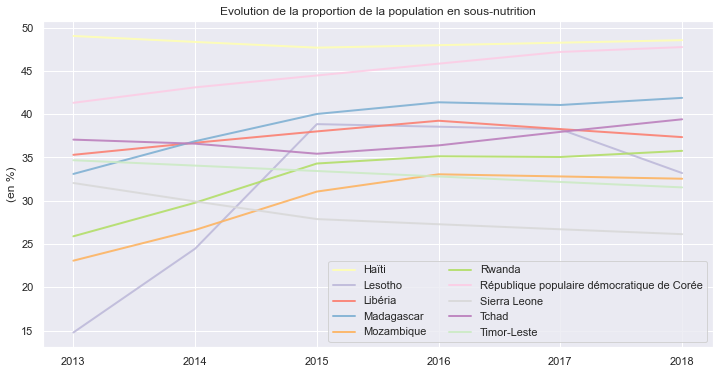

In [44]:
# Graph : évolution du taux de sous-nutrition pour les 10 pays les plus démunis
plt.figure(figsize=(12, 6))
palette = plt.get_cmap("Set3")
num = 0
for column in df_top10.drop("Année", axis=1):
    num += 1
    plt.plot(
        df_top10["Année"],
        df_top10[column],
        marker="",
        color=palette(num),
        linewidth=2,
        alpha=0.9,
        label=column,
    )
plt.legend(loc="lower right", ncol=2)
plt.title("Evolution de la proportion de la population en sous-nutrition")
plt.ylabel("(en %)")
plt.show();

In [45]:
# Jointure avec country.csv pour récupérer le code Alpha 3
df_country_sous_nutrition = df_sous_nutrition_2017.merge(
    df_country, how="left", left_on="Zone", right_on="Country"
)
df_country_sous_nutrition.head()

,Continent_x,Zone,Sous-nutrition,Population,Valeur,Proportion (%),Alpha-3 code,Country,Continent_y
0,Africa,Afrique du Sud,3100000.00,57009756.00,57009756.00,5.44,ZAF,Afrique du Sud,Africa
1,Africa,Algérie,1300000.00,41389189.00,41389189.00,3.14,DZA,Algérie,Africa
2,Africa,Angola,5800000.00,29816766.00,29816766.00,19.45,AGO,Angola,Africa
3,Africa,Bénin,800000.00,11175198.00,11175198.00,7.16,BEN,Bénin,Africa
4,Africa,Botswana,500000.00,2205080.00,2205080.00,22.67,BWA,Botswana,Africa


In [46]:
# Création d'une carte pour visualiser le taux de sous-nutrition par pays en 2017
import plotly.express as px

fig = px.choropleth(
    df_country_sous_nutrition,
    locations="Alpha-3 code",
    color="Proportion (%)",  # lifeExp is a column of gapminder
    hover_name="Zone",  # column to add to hover information
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Sous-nutrition dans le monde en 2017"
)
# Export de la carte en html puis affichage dans un iframe
fig.write_html("map.html")

In [47]:
%%html
<iframe src="map.html" width="1000" height="700" style="border:none"></iframe>

---

#### 2-2 - Disponibilité alimentaire mondiale - Nombre théorique de personnes pouvant être nourries

**Le nombre moyen de calories nécessaires par personne et par jour retenu est 2500.**  
Source : <a href="https://www.fao.org/3/W0073F/w0073f43.pdf">https://www.fao.org/3/W0073F/w0073f43.pdf</a>

Disponibilité alimentaire totale

In [48]:
# Nombre de personnes pouvant être nourries par la disponibilité alimentaire intérieure (Kcal/personne/jour) du pays
df1 = (
    df_dispo_alimentaire.groupby(by="Zone")[
        ["Disponibilité alimentaire (Kcal/personne/jour)"]
    ].sum()
    / 2500
)
df1.columns = ["Personnes nourries"]
df1 = df1.reset_index()
df1.sort_values(by="Personnes nourries").head()

,Zone,Personnes nourries
128,République centrafricaine,0.75
166,Zambie,0.77
91,Madagascar,0.82
0,Afghanistan,0.83
65,Haïti,0.84


**La disponibilité intérieure n'est parfois pas suffisante pour nourrir une seule personne**

In [49]:
# Nombre de personnes pouvant être nourries par la disponibilité alimentaire mondiale
df2 = df_dispo_alimentaire.groupby(by="Zone")[
    ["Disponibilité alimentaire (Kcal/personne/jour)"]
].sum()
df2 = pd.merge(df2, df_population_2017, how="left", on="Zone").copy()
df2["Disponibilité totale"] = (
    df2["Disponibilité alimentaire (Kcal/personne/jour)"] * df2["Valeur"]
)
df2.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Disponibilité totale
0,Afghanistan,2087.00,2017,36296113.00,75749987831.00
1,Afrique du Sud,3020.00,2017,57009756.00,172169463120.00
2,Albanie,3188.00,2017,2884169.00,9194730772.00
3,Algérie,3293.00,2017,41389189.00,136294599377.00
4,Allemagne,3503.00,2017,82658409.00,289552406727.00


In [50]:
dispo_totale = df2["Disponibilité totale"].sum() / 2500
part_dispo_totale = dispo_totale * 100 / population_2017
print(
    "Nombre théorique de personnes pouvant être nourries",
    f"avec la disposition alimentaire mondiale : {int(dispo_totale)}\n",
    f"Soit {round(part_dispo_totale, 2)} % de l'humanité."
)

Nombre théorique de personnes pouvant être nourries avec la disposition alimentaire mondiale : 8472865098
 Soit 112.25 % de l'humanité.


Disponibilité alimentaire totale végétale

In [51]:
# Nombre de personnes pouvant être nourries par la disponibilité alimentaire végétale mondiale
df_dispo_vegetale = df_dispo_alimentaire[df_dispo_alimentaire["Origine"] == "vegetale"]
df_dispo_vegetale = df_dispo_vegetale.groupby(by="Zone")[
    ["Disponibilité alimentaire (Kcal/personne/jour)"]
].sum()
df_dispo_vegetale = pd.merge(
    df_dispo_vegetale, df_population_2017, how="left", on="Zone"
).copy()
df_dispo_vegetale.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
0,Afghanistan,1871.00,2017,36296113.00
1,Afrique du Sud,2533.00,2017,57009756.00
2,Albanie,2203.00,2017,2884169.00
3,Algérie,2915.00,2017,41389189.00
4,Allemagne,2461.00,2017,82658409.00


In [52]:
df_dispo_vegetale["Disponibilité totale"] = (
    df_dispo_vegetale["Disponibilité alimentaire (Kcal/personne/jour)"]
    * df_dispo_vegetale["Valeur"]
)
dispo_vegetale = df_dispo_vegetale["Disponibilité totale"].sum() / 2500
part_dispo_vegetale = dispo_vegetale * 100 / population_2017
print(
    "Nombre théorique de personnes pouvant être nourries avec la", 
    f"disposition alimentaire végétale mondiale : {int(dispo_vegetale)}\n",
    f"Soit {round(part_dispo_vegetale, 2)} % de l'humanité."
)

Nombre théorique de personnes pouvant être nourries avec la disposition alimentaire végétale mondiale : 6979803767
 Soit 92.47 % de l'humanité.


Disponibilité alimentaire totale animale

In [53]:
# Nombre de personnes pouvant être nourries par la disponibilité alimentaire animale mondiale
df_dispo_animale = df_dispo_alimentaire[df_dispo_alimentaire["Origine"] == "animale"]
df_dispo_animale = df_dispo_animale.groupby(by="Zone")[
    ["Disponibilité alimentaire (Kcal/personne/jour)"]
].sum()
df_dispo_animale = pd.merge(
    df_dispo_animale, df_population_2017, how="left", on="Zone"
).copy()
df_dispo_animale.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
0,Afghanistan,216.00,2017,36296113.00
1,Afrique du Sud,487.00,2017,57009756.00
2,Albanie,985.00,2017,2884169.00
3,Algérie,378.00,2017,41389189.00
4,Allemagne,1042.00,2017,82658409.00


In [54]:
df_dispo_animale["Disponibilité totale"] = (
    df_dispo_animale["Disponibilité alimentaire (Kcal/personne/jour)"]
    * df_dispo_animale["Valeur"]
)
dispo_animale = df_dispo_animale["Disponibilité totale"].sum() / 2500
part_dispo_animale = dispo_animale * 100 / population_2017
print(
    "Nombre théorique de personnes pouvant être nourries avec la",
    f" disposition alimentaire animale mondiale : {int(dispo_animale)}\n",
    f"Soit {round(part_dispo_animale, 2)} % de l'humanité."
)

Nombre théorique de personnes pouvant être nourries avec la  disposition alimentaire animale mondiale : 1493061331
 Soit 19.78 % de l'humanité.


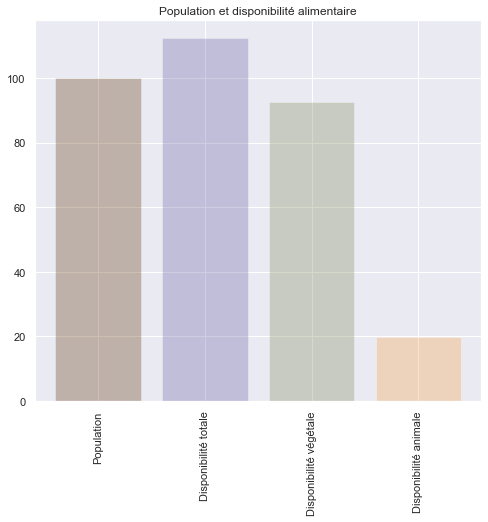

In [55]:
# Graph de comparaison population / disponibilité alimentaire
height = [100, part_dispo_totale, part_dispo_vegetale, part_dispo_animale]
bars = (
    "Population",
    "Disponibilité totale",
    "Disponibilité végétale",
    "Disponibilité animale",
)
y_pos = np.arange(len(bars))

plt.figure(figsize=(8, 7))
plt.bar(y_pos, height, color=["#5B3000", "#5F5AA2", "#7A8450", "#FA9F42"], alpha=0.3)
plt.title("Population et disponibilité alimentaire")
plt.xticks(y_pos, bars, rotation=90)
plt.show();

**La disponibilité alimentaire mondiale, principalement issue des produits végétaux, est théoriquement suffisante pour nourrir la population mondiale.**

---

#### 2-3 - Répartition de la disponibilité alimentaire  
Consommation humaine, consommation animale, pertes

In [56]:
# Création d'un sous dataframe
col = [
    "Zone",
    "Disponibilité intérieure",
    "Aliments pour animaux",
    "Nourriture",
    "Pertes",
    "Semences",
    "Traitement",
    "Autres Utilisations",
]
df3 = df_dispo_alimentaire[col].copy()
df3.head()

,Zone,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes,Semences,Traitement,Autres Utilisations
0,Afghanistan,53.00,0.00,53.00,0.00,0.00,0.00,0.00
1,Afghanistan,41.00,0.00,39.00,2.00,0.00,0.00,0.00
2,Afghanistan,2.00,0.00,2.00,0.00,0.00,0.00,0.00
3,Afghanistan,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,82.00,0.00,82.00,0.00,0.00,0.00,0.00


In [57]:
df3 = df3.groupby(by="Zone").sum()

In [58]:
# Proportion (en %) des différentes utilisations de la disponibilité intérieure par pays
df3["Proportion nourriture animale"] = (
    df3["Aliments pour animaux"] * 100 / df3["Disponibilité intérieure"]
)
df3["Proportion nourriture humaine"] = (
    df3["Nourriture"] * 100 / df3["Disponibilité intérieure"]
)
df3["Proportion pertes"] = df3["Pertes"] * 100 / df3["Disponibilité intérieure"]
df3["Proportion semences"] = df3["Semences"] * 100 / df3["Disponibilité intérieure"]
df3["Proportion traitement"] = df3["Traitement"] * 100 / df3["Disponibilité intérieure"]
df3["Proportion autres utilisations"] = (
    df3["Autres Utilisations"] * 100 / df3["Disponibilité intérieure"]
)
df3.head()

,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes,Semences,Traitement,Autres Utilisations,Proportion nourriture animale,Proportion nourriture humaine,Proportion pertes,Proportion semences,Proportion traitement,Proportion autres utilisations
Zone,,,,,,,,,,,,,
Afghanistan,13515.00,768.00,10735.00,1135.00,395.00,63.00,415.00,5.68,79.43,8.40,2.92,0.47,3.07
Afrique du Sud,61256.00,5309.00,29812.00,2193.00,253.00,22819.00,876.00,8.67,48.67,3.58,0.41,37.25,1.43
Albanie,4758.00,660.00,3476.00,276.00,55.00,113.00,174.00,13.87,73.06,5.80,1.16,2.37,3.66
Algérie,42630.00,4352.00,31729.00,3753.00,449.00,637.00,1707.00,10.21,74.43,8.80,1.05,1.49,4.00
Allemagne,162275.00,30209.00,79238.00,3781.00,1551.00,39842.00,7711.00,18.62,48.83,2.33,0.96,24.55,4.75


In [59]:
df3[
    [
        "Proportion nourriture animale",
        "Proportion nourriture humaine",
        "Proportion pertes",
    ]
].sort_values(by="Proportion pertes", ascending=False).round(2).head(10)

,Proportion nourriture animale,Proportion nourriture humaine,Proportion pertes
Zone,,,
Sierra Leone,13.71,46.73,33.35
Ghana,12.51,57.65,19.08
Cameroun,8.26,58.19,15.18
Angola,28.91,47.02,14.98
Dominique,14.18,48.23,14.18
Guinée,7.71,67.96,12.78
Malawi,20.17,43.30,12.22
Togo,3.69,77.80,11.62
Bulgarie,11.15,54.04,11.52


**Certains pays les plus pauvres sont ceux aussi qui gaspillent le plus.**

In [60]:
df3[
    [
        "Proportion nourriture animale",
        "Proportion nourriture humaine",
        "Proportion pertes",
    ]
].sort_values(by="Proportion nourriture animale", ascending=False).round(2).head(10)

,Proportion nourriture animale,Proportion nourriture humaine,Proportion pertes
Zone,,,
Danemark,39.67,29.34,2.95
Arabie saoudite,37.86,57.42,3.33
Bélarus,37.08,31.69,2.07
Tadjikistan,36.43,56.07,3.49
Irlande,35.00,49.54,2.20
Turkménistan,33.58,47.83,3.67
Canada,32.85,42.66,2.66
Ukraine,32.55,34.93,3.63
Serbie,30.74,39.20,3.89


**Pays à forte production animale**
- <a href="https://www.tresor.economie.gouv.fr/Articles/184e68cd-07e5-4805-b2d8-1175bb3a0553/files/97a6bcbb-79be-4ca8-8071-10eb1fdef3fa#:~:text=Les%20trois%20secteurs%20principaux%20de,positionner%20en%20tant%20que%201er"> Danemark</a> : porc, bœuf, volailles et vison, aquaculture
- <a href="https://fr.wikipedia.org/wiki/Agriculture_en_Arabie_saoudite#Productions_agricoles_et_animales">Arabie Saoudite</a> : vaches laitières, la volaille (poulet de chair et œufs), les chameaux, les petits ruminants, l’aquaculture  
...

In [61]:
df3[
    [
        "Proportion nourriture animale",
        "Proportion nourriture humaine",
        "Proportion pertes",
    ]
].sort_values(by="Proportion nourriture humaine", ascending=False).round(2).head(10)

,Proportion nourriture animale,Proportion nourriture humaine,Proportion pertes
Zone,,,
Chine - RAS de Macao,0.00,96.08,0.26
Timor-Leste,2.01,93.74,3.13
Yémen,2.15,93.66,2.75
Lesotho,0.10,93.06,5.28
Rwanda,0.00,92.23,4.33
Mauritanie,4.15,90.90,3.50
Chine - RAS de Hong-Kong,1.56,89.94,3.36
Botswana,1.92,88.83,4.07
Brunéi Darussalam,3.06,88.78,1.36


**Certains pays utilisent presque 100% de la disponibilité alimentaire pour leur population.**

In [62]:
# Proportion mondiale des utilisations de la disponibilité intérieure
part_nourrite_animale = (
    df3["Aliments pour animaux"].sum() * 100 / df3["Disponibilité intérieure"].sum()
)
part_nourrite_humaine = (
    df3["Nourriture"].sum() * 100 / df3["Disponibilité intérieure"].sum()
)
part_pertes = df3["Pertes"].sum() * 100 / df3["Disponibilité intérieure"].sum()
part_semences = df3["Semences"].sum() * 100 / df3["Disponibilité intérieure"].sum()
part_traitements = df3["Traitement"].sum() * 100 / df3["Disponibilité intérieure"].sum()
part_autres = (
    df3["Autres Utilisations"].sum() * 100 / df3["Disponibilité intérieure"].sum()
)

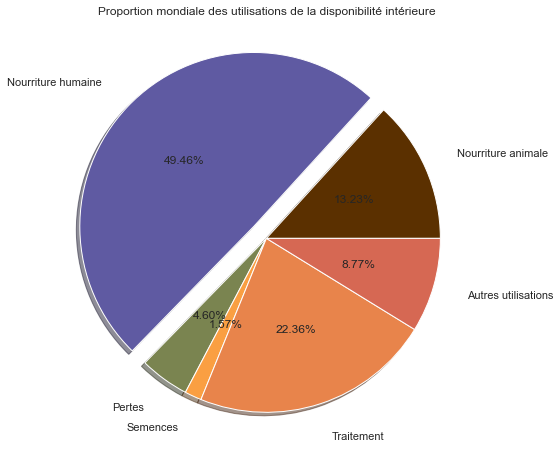

In [63]:
# Graph : proportion mondiale des utilisations de la disponibilité intérieure
colors = ["#5B3000", "#5F5AA2", "#7A8450", "#FA9F42", "#E8844B", "#D66853"]
plt.figure(figsize=(8, 8))
x = [
    part_nourrite_animale,
    part_nourrite_humaine,
    part_pertes,
    part_semences,
    part_traitements,
    part_autres,
]
plt.pie(
    x,
    labels=[
        "Nourriture animale",
        "Nourriture humaine",
        "Pertes",
        "Semences",
        "Traitement",
        "Autres utilisations",
    ],
    colors=colors,
    explode=[0, 0.1, 0, 0, 0, 0],
    autopct="%.2f%%",
    pctdistance=0.55,
    labeldistance=1.2,
    shadow=True,
)
plt.title("Proportion mondiale des utilisations de la disponibilité intérieure")
plt.show();

**50 % de la disponibilité alimentaire mondiale est utilisée pour nourrir la population. Rassurant ?**

---

#### 2-4 - Zoom sur les céréales

In [64]:
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53.00,0.00,0.00,53.00,0.00,53.00,0.00,0.00,0.00
1,Afghanistan,"Agrumes, Autres",vegetale,0.00,0.00,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,0.00,0.00,0.00
2,Afghanistan,Aliments pour enfants,vegetale,0.00,0.00,1.00,0.06,0.01,0.03,2.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Ananas,vegetale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,Bananes,vegetale,0.00,0.00,4.00,2.70,0.02,0.05,82.00,0.00,82.00,82.00,0.00,0.00,0.00,0.00,0.00


In [65]:
df_dispo_alimentaire["Produit"].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [66]:
# Liste des céréales
cereales = [
    "Blé",
    "Céréales, Autres",
    "Maïs",
    "Millet",
    "Orge",
    "Riz (Eq Blanchi)",
    "Avoine",
    "Seigle",
    "Sorgho",
]

In [67]:
# Création d'un dataframe ne contenant que les céréales
df6 = df_dispo_alimentaire[df_dispo_alimentaire["Produit"].isin(cereales)]

In [68]:
# Calcul des proportions d'utilisation des céréales
df6 = df6.groupby(by="Zone").sum()
df6["Proportion animaux"] = (
    df6["Aliments pour animaux"] * 100 / df6["Disponibilité intérieure"]
)
df6["Proportion humains"] = df6["Nourriture"] * 100 / df6["Disponibilité intérieure"]

In [69]:
col = [
    "Aliments pour animaux",
    "Nourriture",
    "Disponibilité intérieure",
    "Proportion animaux",
    "Proportion humains",
]
df6 = df6[col].round(2).sort_values(by="Proportion animaux", ascending=False)
df6.head(10)

,Aliments pour animaux,Nourriture,Disponibilité intérieure,Proportion animaux,Proportion humains
Zone,,,,,
Danemark,6649.00,737.00,8073.00,82.36,9.13
Irlande,2861.00,584.00,3742.00,76.46,15.61
Espagne,24926.00,4971.00,33495.00,74.42,14.84
Canada,23905.00,4200.00,32769.00,72.95,12.82
Croatie,1990.00,520.00,2816.00,70.67,18.47
Arabie saoudite,11680.00,4439.00,16595.00,70.38,26.75
Serbie,4956.00,1277.00,7069.00,70.11,18.06
Bélarus,5356.00,1040.00,7760.00,69.02,13.40
Chypre,310.00,106.00,450.00,68.89,23.56


**Confirmation des pays à forte production animale**  
Jusqu'à 82,4% de la disponibilité intérieure céréalière est utilisée pour nourrir les animaux au Danemark.

In [70]:
df6 = df6[col].round(2).sort_values(by="Proportion humains", ascending=False)
df6.head(10)
# Les pays "pauvres" utilisent principalement les céréales pour la nourriture humaine

,Aliments pour animaux,Nourriture,Disponibilité intérieure,Proportion animaux,Proportion humains
Zone,,,,,
Sao Tomé-et-Principe,0.00,20.00,20.00,0.00,100.00
Chine - RAS de Hong-Kong,2.00,763.00,802.00,0.25,95.14
Djibouti,0.00,146.00,155.00,0.00,94.19
Timor-Leste,8.00,184.00,197.00,4.06,93.40
Kiribati,0.00,12.00,13.00,0.00,92.31
Mauritanie,12.00,668.00,724.00,1.66,92.27
Lesotho,1.00,469.00,514.00,0.19,91.25
Yémen,210.00,3950.00,4354.00,4.82,90.72
Kenya,146.00,5677.00,6303.00,2.32,90.07


**Certains pays "pauvres" utilisent raisonnablement jusqu'à 100% de la disponibilité intérieure céréalière.**

---

#### 2-5 - Etude du cas de l'utilisation du manioc en Thaïlande

In [71]:
# Création d'un sous dataframe
df7 = df_dispo_alimentaire[
    (df_dispo_alimentaire["Zone"] == "Thaïlande")
    & (df_dispo_alimentaire["Produit"] == "Manioc")
].copy()
df7.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.00,2081.00,40.00,13.00,0.05,0.14,6264.00,25214.00,1250.00,871.00,1511.00,30228.00,0.00,0.00,0.00


In [72]:
# Calcul du taux d'exportation du manioc en Thaïlande'
taux_exportation = df7["Exportations - Quantité"] * 100 / df7["Production"]
taux_exportation.values

array([83.41272992])

**Plus de 83% de la production du manioc en Thaïlande est exportée**  
Exportation pour la fabrication d'éthanol (Chine), d'amidon (Chine et Europe) et la nourriture animale (NZ)  
Source : <a href="https://www.planetoscope.com/cereales/1627-production-mondiale-de-manioc.html">Planetoscope</a>

In [73]:
df_sous_nutrition_2017[df_sous_nutrition_2017["Zone"] == "Thaïlande"]

,Continent,Zone,Sous-nutrition,Population,Valeur,Proportion (%)
93,Asia,Thaïlande,6200000.00,69209810.00,69209810.00,8.96


**En diminuant ses exportations de manioc, tubercule très nourrissante, la Thaïlande pourrait largement subvenir aux besoins alimentaires de sa population.**

---

#### 2-6 - Demande de Mélanie

In [74]:
# Proportion de personnes sous-alimentées
df_sous_nutrition_2017.sort_values(by="Proportion (%)", ascending=False).head(15)

,Continent,Zone,Sous-nutrition,Population,Valeur,Proportion (%)
149,North America,Haïti,5300000.00,10982366.00,10982366.00,48.26
89,Asia,République populaire démocratique de Corée,12000000.00,25429825.00,25429825.00,47.19
26,Africa,Madagascar,10500000.00,25570512.00,25570512.00,41.06
25,Africa,Libéria,1800000.00,4702226.00,4702226.00,38.28
24,Africa,Lesotho,800000.00,2091534.00,2091534.00,38.25
...,...,...,...,...,...,...
11,Africa,Congo,1400000.00,5110695.00,5110695.00,27.39
188,South America,Venezuela (République bolivarienne du),8000000.00,29402484.00,29402484.00,27.21
44,Africa,Sierra Leone,2000000.00,7488423.00,7488423.00,26.71
39,Africa,République-Unie de Tanzanie,13400000.00,54660339.00,54660339.00,24.52


In [75]:
# Disponibilité alimentaire / nourriture par habitant en kg
df8 = df_dispo_alimentaire.groupby(by="Zone").sum()
df8 = df8.reset_index()
df8 = df8.merge(df_population_2017, how="inner", on="Zone")
df8.rename(columns={"Valeur": "Population"}, inplace=True)
df8 = df8[["Zone", "Disponibilité intérieure", "Nourriture", "Population"]].copy()
df8.head()

,Zone,Disponibilité intérieure,Nourriture,Population
0,Afghanistan,13515.00,10735.00,36296113.00
1,Afrique du Sud,61256.00,29812.00,57009756.00
2,Albanie,4758.00,3476.00,2884169.00
3,Algérie,42630.00,31729.00,41389189.00
4,Allemagne,162275.00,79238.00,82658409.00


In [76]:
df8["Disp. intérieure par habitant"] = (
    df8["Disponibilité intérieure"] * 1000000 / df8["Population"]
)
df8["Disp. nourriture par habitant"] = df8["Nourriture"] * 1000000 / df8["Population"]

In [77]:
df8.sort_values(by="Disp. nourriture par habitant").head()

,Zone,Disponibilité intérieure,Nourriture,Population,Disp. intérieure par habitant,Disp. nourriture par habitant
151,Tchad,5304.00,4097.00,15016753.00,353.21,272.83
0,Afghanistan,13515.00,10735.00,36296113.00,372.35,295.76
166,Zambie,10041.00,5088.00,16853599.00,595.78,301.89
172,Éthiopie,44014.00,33361.00,106399924.00,413.67,313.54
56,Gambie,940.00,701.00,2213889.00,424.59,316.64


**Attention, les produits comme le sucre et les huiles avec un fort tonnage biaisent l'analyse de la disponibilité alimentaire et de la nourriture en kg par habitant.**

In [78]:
# Disponibilité des céréales par habitant (en kg)
df9 = df6.copy()
df9.drop(
    columns=["Aliments pour animaux", "Proportion animaux", "Proportion humains"],
    inplace=True,
)
df9 = df9.reset_index()
df9 = df9.merge(df_population_2017, how="inner", on="Zone")

In [79]:
df9["Disp. intérieure par habitant"] = (
    df9["Disponibilité intérieure"] * 1000000 / df9["Valeur"]
)
df9["Disp. nourriture par habitant"] = df9["Nourriture"] * 1000000 / df9["Valeur"]

In [80]:
df9.sort_values(by="Disp. nourriture par habitant").head()

,Zone,Nourriture,Disponibilité intérieure,Année,Valeur,Disp. intérieure par habitant,Disp. nourriture par habitant
35,Rwanda,532.00,691.00,2017,11980961.00,57.67,44.40
16,République centrafricaine,238.00,275.00,2017,4596023.00,59.83,51.78
27,Congo,286.00,351.00,2017,5110695.00,68.68,55.96
90,Bermudes,4.00,8.00,2017,63049.00,126.89,63.44
59,Angola,1911.00,2950.00,2017,29816766.00,98.94,64.09


**Si l'on ne considère que les céréales, la disponibilité alimentaire et la nourriture en kg par habitant est bien inférieure.**

In [81]:
df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [82]:
# Cumul des différentes aides reçues par pays et par année
df10 = df_aide_alimentaire.groupby(by=["Pays bénéficiaire", "Année"]).sum()
df10 = df10.reset_index()
df10.rename(columns={"Pays bénéficiaire": "Zone", "Valeur": "Aide"}, inplace=True)
df10.sort_values(by="Aide", ascending=False).head(10)

,Zone,Année,Aide
158,République arabe syrienne,2014,651870
225,Éthiopie,2013,591404
226,Éthiopie,2014,586624
157,République arabe syrienne,2013,563566
159,République arabe syrienne,2015,524949
217,Yémen,2016,465574
193,Soudan du Sud,2014,450610
216,Yémen,2015,372306
189,Soudan,2013,330230
190,Soudan,2014,321904


In [83]:
# Jointure pour importer la population pour chaque pays et chaque année
df10 = df10.merge(df_population, on=["Zone", "Année"])

In [84]:
# Aide alimentaire par habitant (en kg)
df10["Aide par habitant"] = df10["Aide"] * 1000 / df10["Valeur"]
df10.sort_values("Aide par habitant", ascending=False)

,Zone,Année,Aide,Valeur,Aide par habitant
193,Soudan du Sud,2014,450610,10554880.00,42.69
158,République arabe syrienne,2014,651870,18710711.00,34.84
159,République arabe syrienne,2015,524949,17997408.00,29.17
157,République arabe syrienne,2013,563566,19578461.00,28.79
50,Djibouti,2013,20368,883293.00,23.06
...,...,...,...,...,...
44,Cuba,2014,14,11306904.00,0.00
34,"Chine, continentale",2014,1298,1399453965.00,0.00
15,Bolivie (État plurinational de),2014,6,10706517.00,0.00
7,Angola,2014,14,26941779.00,0.00


**Le Soudan du Sud a reçu 42,69 kg d'aide alimentaire par habitant en 2017.**

In [85]:
from mitosheet import *

df11 = df_aide_alimentaire.pivot_table(
    index=["Pays bénéficiaire"],
    columns=["Année"],
    values=["Valeur"],
    aggfunc={"Valeur": ["sum"]},
    
)
df11.fillna(0, inplace=True)
df11.columns = [flatten_column_header(col) for col in df11.columns.values]
df12 = df11.reset_index()
df12.head()

,Pays bénéficiaire,Valeur sum 2013,Valeur sum 2014,Valeur sum 2015,Valeur sum 2016
0,Afghanistan,128238.00,57214.00,0.00,0.00
1,Algérie,35234.00,18980.00,17424.00,9476.00
2,Angola,5000.00,14.00,0.00,0.00
3,Bangladesh,131018.00,194628.00,22542.00,0.00
4,Bhoutan,1724.00,146.00,578.00,218.00


In [86]:
# Liste des pays ayant reçu le plus d'aides alimentaires cumulées entre 2013 et 2016
df12.rename(
    columns={
        "Valeur sum 2013": "2013",
        "Valeur sum 2014": "2014",
        "Valeur sum 2015": "2015",
        "Valeur sum 2016": "2016",
    },
    inplace=True,
)
df12["Total"] = df12.iloc[:, 1:].sum(axis=1)
df12 = df12.sort_values("Total", ascending=False)
df12.head()

,Pays bénéficiaire,2013,2014,2015,2016,Total
50,République arabe syrienne,563566.00,651870.00,524949.00,118558.00,1858943.00
75,Éthiopie,591404.00,586624.00,203266.00,0.00,1381294.00
70,Yémen,264764.00,103840.00,372306.00,465574.00,1206484.00
61,Soudan du Sud,196330.00,450610.00,48308.00,0.00,695248.00
60,Soudan,330230.00,321904.00,17650.00,0.00,669784.00


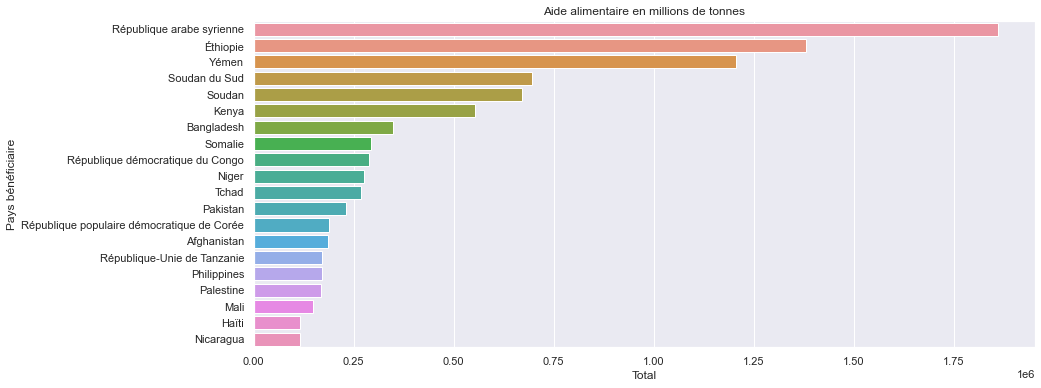

In [87]:
df12 = df12.iloc[:20, :]
plt.figure(figsize=(14, 6))
sns.barplot(y="Pays bénéficiaire", x="Total", data=df12)
plt.title("Aide alimentaire en millions de tonnes")
plt.show();

---

#### 2-7 - Autres indicateurs

In [88]:
df13 = df_dispo_alimentaire.groupby(by="Zone").sum()
df13.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.00,415.00,2087.00,351.41,33.50,58.26,13515.00,278.00,2988.00,10735.00,1135.00,11171.00,395.00,63.00,-368.00
Afrique du Sud,5309.00,876.00,3020.00,564.80,83.58,85.33,61256.00,11674.00,7517.00,29812.00,2193.00,63263.00,253.00,22819.00,2153.00
Albanie,660.00,174.00,3188.00,1095.54,106.48,111.37,4758.00,94.00,933.00,3476.00,276.00,3964.00,55.00,113.00,-45.00
Algérie,4352.00,1707.00,3293.00,809.13,76.48,91.92,42630.00,655.00,17403.00,31729.00,3753.00,26359.00,449.00,637.00,-479.00
Allemagne,30209.00,7711.00,3503.00,957.52,141.62,101.39,162275.00,57431.00,65353.00,79238.00,3781.00,154547.00,1551.00,39842.00,-192.00


In [89]:
# Taux de dépendance des importations
df13["Taux dépendance importation"] = (
    df13["Importations - Quantité"]
    / (
        df13["Production"]
        + df13["Importations - Quantité"]
        - df13["Exportations - Quantité"]
        + df13["Variation de stock"]
    )
    * 100
)

In [90]:
# Taux d'autosuffisance
df13["Taux autosuffisance"] = (
    df13["Production"]
    / (
        df13["Production"]
        + df13["Importations - Quantité"]
        - df13["Exportations - Quantité"]
        + df13["Variation de stock"]
    )
    * 100
)

In [91]:
# Liste des pays ayant le plus faible taux d'autosuffisance
df13[["Taux dépendance importation", "Taux autosuffisance"]].sort_values(
    by="Taux autosuffisance"
).round(2).head(10)

,Taux dépendance importation,Taux autosuffisance
Zone,,
Chine - RAS de Macao,95.82,4.18
Chine - RAS de Hong-Kong,148.13,7.32
Émirats arabes unis,129.35,10.06
Bermudes,130.51,10.17
Djibouti,308.92,14.42
Koweït,96.34,16.61
Brunéi Darussalam,83.85,20.62
Trinité-et-Tobago,84.08,25.75
Antigua-et-Barbuda,82.89,26.32


In [92]:
# Liste des pays ayant la plus forte dépendance aux importations
df13[["Taux dépendance importation", "Taux autosuffisance"]].sort_values(
    by="Taux dépendance importation", ascending=False
).round(2).head(10)

,Taux dépendance importation,Taux autosuffisance
Zone,,
Djibouti,308.92,14.42
Chine - RAS de Hong-Kong,148.13,7.32
Luxembourg,133.33,73.48
Bermudes,130.51,10.17
Émirats arabes unis,129.35,10.06
Pays-Bas,124.62,98.06
Belgique,120.14,83.42
Oman,98.38,33.20
Koweït,96.34,16.61


**Logiquement, les pays ayant un faible taux d'autosuffisance sont ceux les plus dépendants aux importations.**

In [93]:
df_sous_nutrition_2017.head()

,Continent,Zone,Sous-nutrition,Population,Valeur,Proportion (%)
0,Africa,Afrique du Sud,3100000.00,57009756.00,57009756.00,5.44
1,Africa,Algérie,1300000.00,41389189.00,41389189.00,3.14
2,Africa,Angola,5800000.00,29816766.00,29816766.00,19.45
3,Africa,Bénin,800000.00,11175198.00,11175198.00,7.16
4,Africa,Botswana,500000.00,2205080.00,2205080.00,22.67


In [94]:
df13 = df13.reset_index()
df14 = df13.merge(df_sous_nutrition_2017, how="inner", on="Zone")
df14[
    ["Zone", "Taux dépendance importation", "Taux autosuffisance", "Proportion (%)"]
].sort_values(by="Proportion (%)", ascending=False).head(20)

,Zone,Taux dépendance importation,Taux autosuffisance,Proportion (%)
60,Haïti,19.47,82.02,48.26
125,République populaire démocratique de Corée,6.67,93.32,47.19
85,Madagascar,6.07,93.02,41.06
81,Libéria,23.45,76.50,38.28
78,Lesotho,48.29,43.23,38.25
...,...,...,...,...
74,Kenya,9.84,93.10,23.70
21,Botswana,76.70,40.19,22.67
144,Togo,17.11,84.42,20.78
39,Côte d'Ivoire,12.28,104.12,20.05


**Paradoxalement, certains pays ayant la plus forte proportion de leur population en sous-nutrition ont un taux d'autosuffisance (production) entre 80 et 100%.  
Les différentes utilisations de leur production et disponibilité alimentaire intérieures sont probablement déséquilibrées.**

In [95]:
# Les 20 aliments les plus exportés
df_dispo_alimentaire.groupby("Produit").sum().sort_values(
    "Exportations - Quantité", ascending=False
)["Exportations - Quantité"].head(20)

Produit
Blé                      198380.00
Maïs                     128787.00
Lait - Excl Beurre       125098.00
Soja                     106912.00
Sucre Eq Brut             68320.00
Huile de Palme            50673.00
Légumes, Autres           44535.00
Orge                      41585.00
Riz (Eq Blanchi)          41445.00
Oranges, Mandarines       37489.00
Manioc                    36052.00
Fruits, Autres            30165.00
Pommes de Terre           29259.00
Poissons Pelagiques       23134.00
Tomates                   21987.00
Graines Colza/Moutarde    21814.00
Bananes                   21662.00
Pommes                    18471.00
Viande de Volailles       16692.00
Viande de Suides          15445.00
Name: Exportations - Quantité, dtype: float64

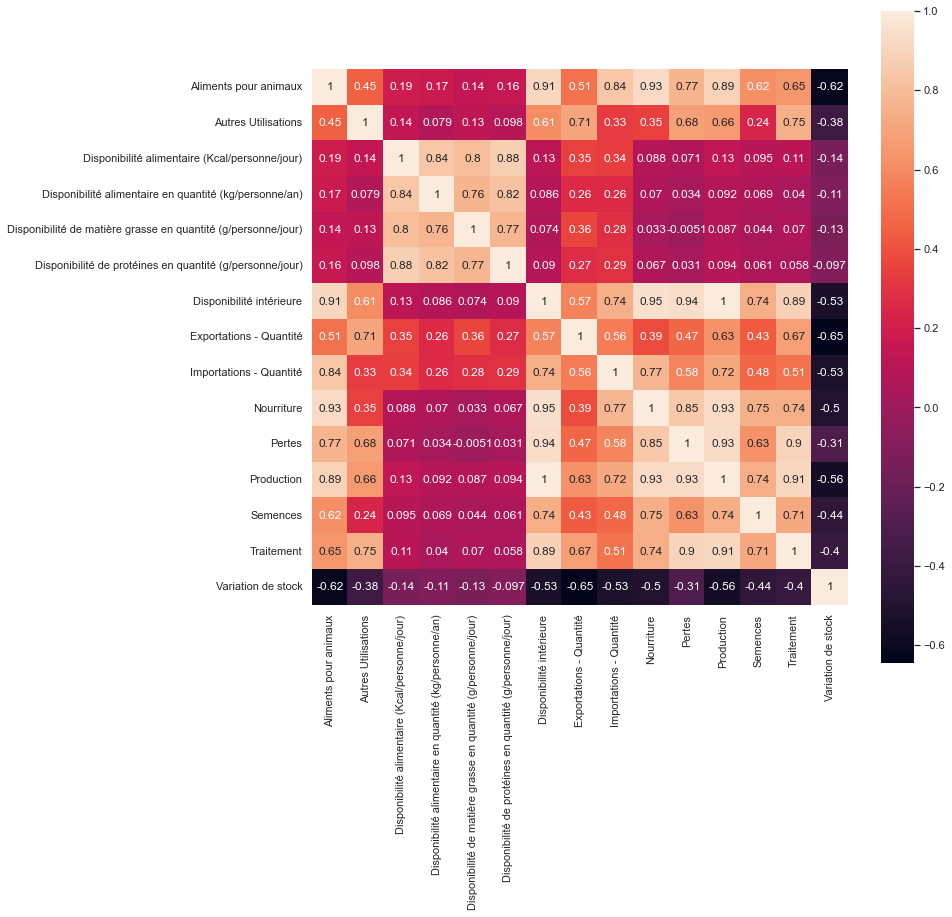

In [96]:
# Corrélation entre les variables de la disposition alimentaire
df_temp = df_dispo_alimentaire.groupby("Zone").sum().reset_index()
plt.figure(figsize=(12, 12))
sns.heatmap(df_temp.corr(), annot=True, square=True)
plt.show();

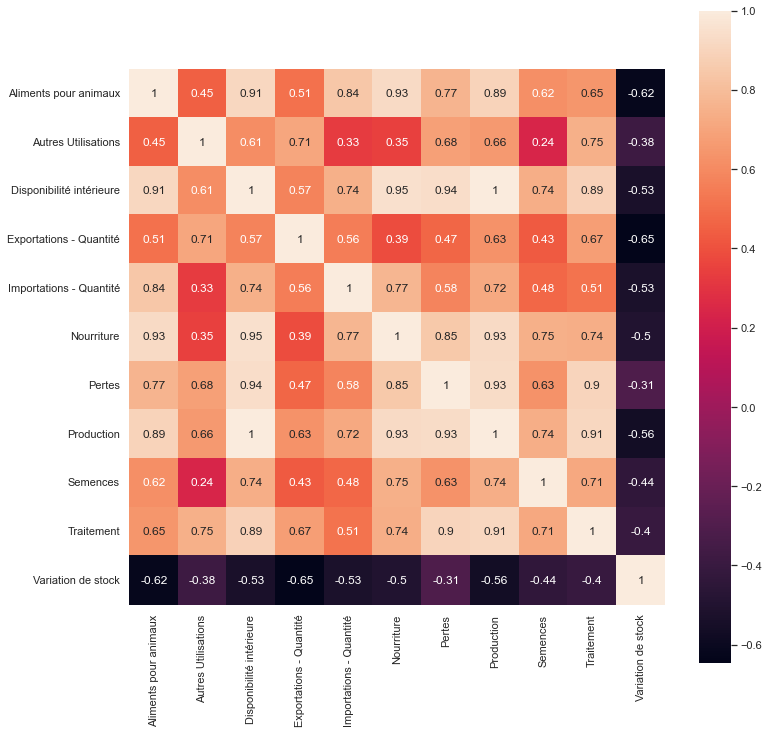

In [97]:
# Seule la disponibilité intérieure est conservée
# Corrélation positive logique des 4 autres variables "Disponibilité..."
df_temp = df_temp.drop(
    columns=[
        "Disponibilité alimentaire (Kcal/personne/jour)",
        "Disponibilité alimentaire en quantité (kg/personne/an)",
        "Disponibilité de matière grasse en quantité (g/personne/jour)",
        "Disponibilité de protéines en quantité (g/personne/jour)",
    ]
)
plt.figure(figsize=(12,12))
sns.heatmap(df_temp.corr(), annot=True, square=True)
plt.show();

Corrélation positive forte :
- Aliments pour animaux / Disponibilité intérieure - Importations - Quantité - Nourriture - Production  
- Disponibilité intérieure / Traitement - Pertes - Nourriture
- Nourriture / Production - Pertes
- Pertes / Traitement - Production
- Production / Pertes

## **Pourquoi les pays recevant le plus d'aides ne sont pas ceux les plus sous-nutris ? Guerre, aides alimentaires "politiques" ?**